In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [69]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [70]:
test_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [72]:
train_data.drop(['id'], axis=1, inplace=True)

<Axes: xlabel='Age'>

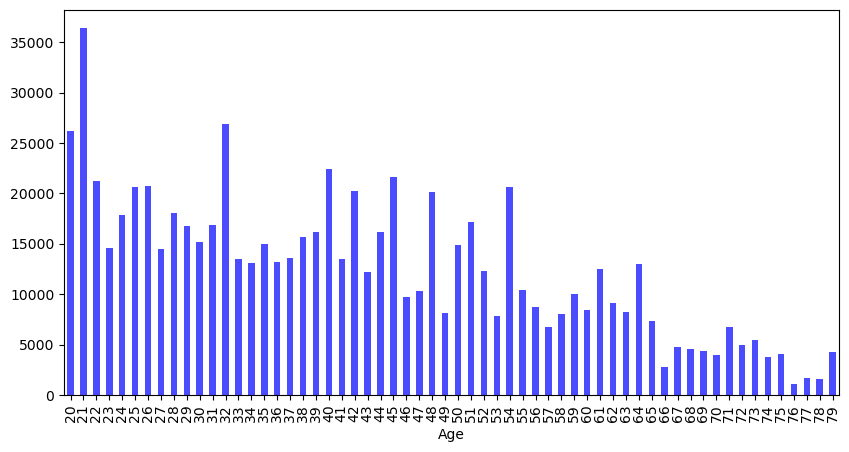

In [73]:
train_data['Age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

<Axes: xlabel='Sex'>

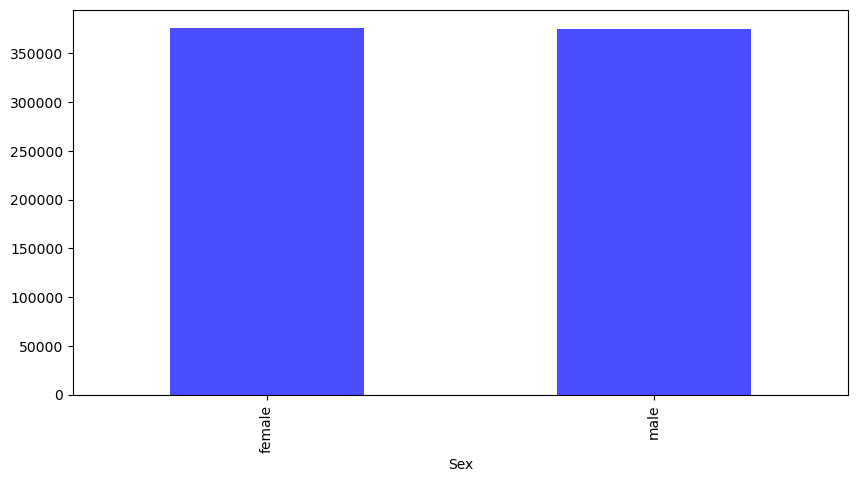

In [74]:
train_data['Sex'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

<Axes: xlabel='Height'>

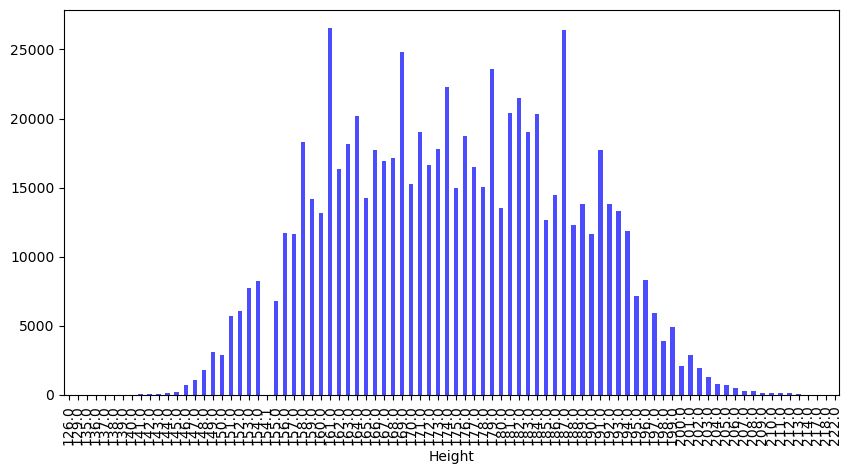

In [75]:
train_data['Height'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

<Axes: xlabel='Weight'>

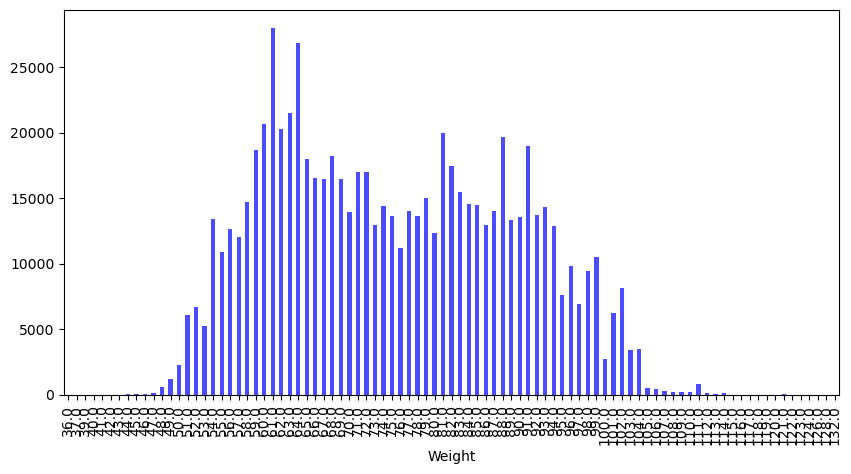

In [76]:
train_data['Weight'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

<Axes: xlabel='Duration'>

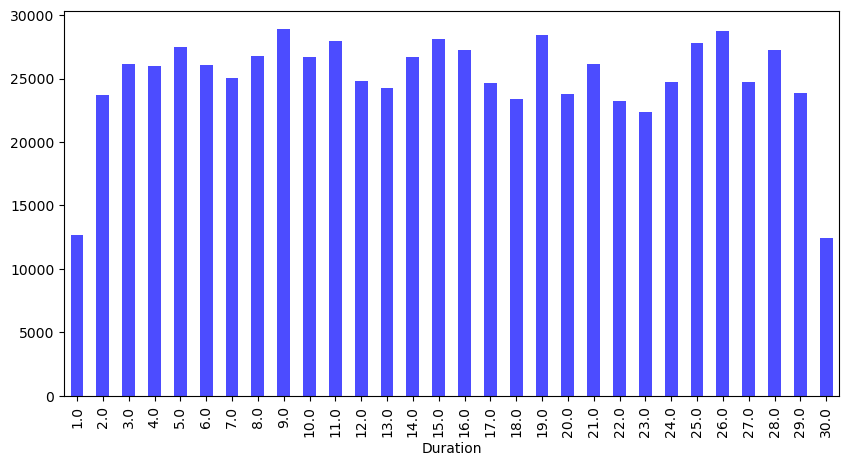

In [77]:
train_data['Duration'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

<Axes: xlabel='Heart_Rate'>

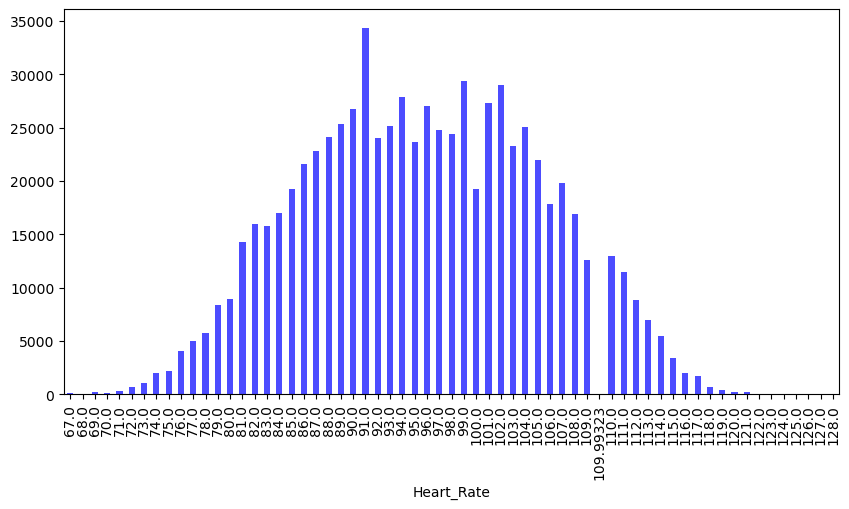

In [78]:
train_data['Heart_Rate'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

<Axes: xlabel='Body_Temp'>

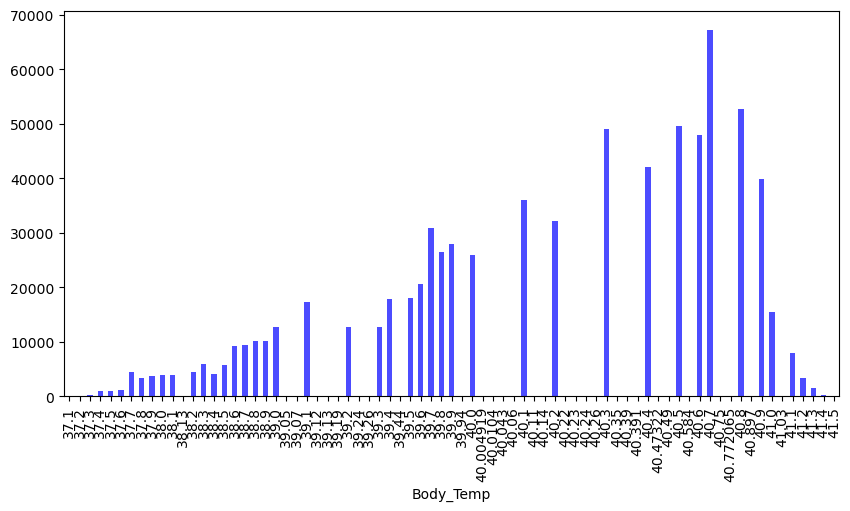

In [79]:
train_data['Body_Temp'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

<Axes: xlabel='Calories'>

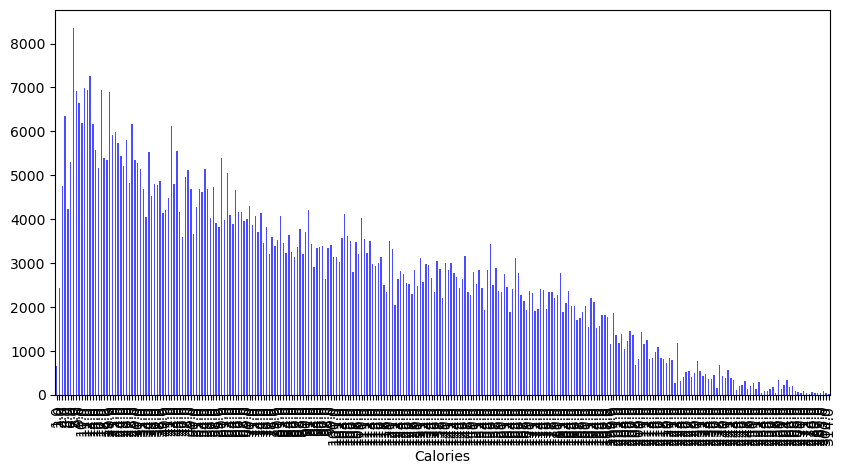

In [80]:
train_data['Calories'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.7)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [82]:
le = LabelEncoder()
train_data['sex_encoded'] = le.fit_transform(train_data['Sex'])

In [83]:
x = train_data[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'sex_encoded']]
y = train_data['Calories']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(X_test)

In [87]:
y_pred = np.maximum(0, y_pred)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSLE:", rmsle)

RMSLE: 10.574981705021179


In [92]:
print(y_pred[:10])
print(y_test[:10])

[197.08686251  67.31936343  41.13220736 103.52671741  57.47511944
  73.55991713  45.91946187  51.19835265 165.20571852 171.7675109 ]
404846    200.0
580313     64.0
552086     39.0
370876    103.0
239330     52.0
590719     77.0
491326     31.0
271448     46.0
430275    195.0
245481    169.0
Name: Calories, dtype: float64
